In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bill_df = pd.read_csv('/content/Billboard_Chart_30_04.csv')
tw_1 = pd.read_csv('/content/Twitter_Billboard_Data_01_05.csv')
tw_2 = pd.read_csv('/content/Twitter_Billboard_Data_02_05.csv')
tw_3 = pd.read_csv('/content/Twitter_Billboard_Data_03_05.csv')
tw_4 = pd.read_csv('/content/Twitter_Billboard_Data_04_05.csv')
tw_5 = pd.read_csv('/content/Twitter_Billboard_Data_06_05.csv')
tw_6 = pd.read_csv('/content/Twitter_Billboard_Data_08_05.csv')
tw_7 = pd.read_csv('/content/Twitter_Billboard_Data_05_05.csv')


In [ ]:
now_p1 = pd.read_csv('/content/Twitter_NowPlaying_Data_01_05.csv')
now_p2 = pd.read_csv('/content/Twitter_NowPlaying_Data_02_05.csv')
now_p3 = pd.read_csv('/content/Twitter_NowPlaying_Data_03_05.csv')
now_p4 = pd.read_csv('/content/Twitter_NowPlaying_Data_04_05.csv')
now_p5 = pd.read_csv('/content/Twitter_NowPlaying_Data_05_05.csv')
now_p6 = pd.read_csv('/content/Twitter_NowPlaying_Data_06_05.csv')
now_p7 = pd.read_csv('/content/Twitter_NowPlaying_Data_08_05.csv')

In [ ]:
#merging all twitter data
frames = [tw_1, tw_2, tw_3, tw_4, tw_5, tw_6, tw_7]
frames_np = [now_p1, now_p2, now_p3, now_p4, now_p5, now_p6, now_p7]
result = pd.concat(frames)
result_np = pd.concat(frames_np)

In [ ]:
result.head()

,Unnamed: 0,ID,User,Follower Count,Tweet,Created At,Favourite Count,Retweet Count
0,0,1518930034261594114,Legola Media,25,Be straight forward when it comes to designing...,2022-04-26 12:28:35,0,0
1,1,1518926859165216773,@ClubDeAmigosDeElvisEnChile,538,Sabias que #Elvis esta incluido en el Salón de...,2022-04-26 12:15:58,0,2
2,2,1518925671707275265,MHI Meaux Haus International,7,#PROMOTION #meauxhausint #harrystyles #music #...,2022-04-26 12:11:15,0,0
3,3,1518919594727165952,"BIGTIME RADIO, TV & ENTERTAINMENT",2078,Kacey Musgraves - Wonder Woman #bigtimeradio h...,2022-04-26 11:47:06,1,0
4,4,1518919153922756610,Match Ad Location,573,"#Billboard Jl. Adityawarman no. 46, Surabaya B...",2022-04-26 11:45:21,0,0


In [ ]:
result_np.head()

,Unnamed: 0,ID,User,Follower Count,Tweet,Created At,Favourite Count,Retweet Count
0,0,1518944577113239552,Tolu madariola,96200,#NowPlaying Would you die for Love by dRem tgi...,2022-04-26 13:26:22,0,0
1,1,1518944563280310272,せは,26,ノクティルーカ - Orangestar feat. 夏背\nComposed by \nf...,2022-04-26 13:26:19,0,0
2,2,1518944557328703493,NeoPlaylist,762,#nowplaying #radioneo #JOWEDINETJEANFELZINE - ...,2022-04-26 13:26:17,0,0
3,3,1518944551917932545,juke80s,522,"#NowPlaying ""Hot For Teacher _ 1984 "" by Van ...",2022-04-26 13:26:16,0,0
4,4,1518944539360337922,Fresh Music Flavour,74,"#NowPlaying "" @KB_HGA - Let It Reign (feat. B...",2022-04-26 13:26:13,0,0


In [ ]:
#cleaning tweets function
import regex as re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def remove_pattern(text, pattern):
    r = re.findall(pattern, text)
    for i in r:
        text = re.sub(i, '', text)        
    return text
def cleanTweets(text):
    #remove twitter handles (@xxx)
    text = re.sub(r'(@[A-Za-z0-9_]+)', '', text)
    
    #remove URL links (httpxxx)
    text = re.sub('http://\S+|https://\S+', '', text)
    
    #remove special characters, numbers, punctuations (except for #)
    text = re.sub(r'[^\w\s]', '', text)
    
    text_tokens = word_tokenize(text)
    text = [word for word in text_tokens if not word in stopwords.words()]
    
    text = ' '.join(text)
    return text

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
cleaned_tweets =[]
a = 0
for i in result.Tweet:
    clean_tweet = cleanTweets(result.Tweet.iloc[a])
    cleaned_tweets.append(clean_tweet)
    a=a+1

result.insert(6, 'Cleaned Tweet', cleaned_tweets, True)        
print('Tweets Cleaned')

Tweets Cleaned


In [ ]:
cleaned_tweets_np =[]
a = 0
for i in result_np.Tweet:
    clean_tweet_np = cleanTweets(result_np.Tweet.iloc[a])
    cleaned_tweets_np.append(clean_tweet_np)
    a=a+1

result_np.insert(6, 'Cleaned Tweet', cleaned_tweets_np, True)        
print('Tweets Cleaned')

Tweets Cleaned


In [ ]:
result.head(50)

,Unnamed: 0,ID,User,Follower Count,Tweet,Created At,Cleaned Tweet,Favourite Count,Retweet Count
0,0,1520777141318656006,Adlib Records,268,We know WHO you are!? You're OWN Trademark ™️ ...,2022-05-01 14:48:19,We know WHO Youre OWN Trademark ️ amp ChartBul...,0,0
1,1,1520773353870704640,Ciappy DJ,381,Neo SOUL 🥃 RnB 2K22\n#wearesoul #soul #neosoul...,2022-05-01 14:33:16,Neo SOUL RnB 2K22 wearesoul soul neosoul rnb s...,0,0
2,2,1520773194944172032,Gerade_che,139,Thanks @keungshowUSA @Keungshow_hkfc supportin...,2022-05-01 14:32:38,Thanks supporting Hong Kong brightest star Keu...,0,0
3,3,1520771786647945217,Jazz The Ceo / I dream In COLOR!,3550,#NewMusic #NewMusicAlert “Hot Hot” by @ObaRow...,2022-05-01 14:27:03,NewMusic NewMusicAlert Hot Hot amp spotifypodc...,1,0
4,4,1520769173479206913,SïbT₩॰dollaboyzCeO Di🚀k Pet 💅🏼,88,#Ad #Billboard #snapple https://t.co/40k0MSaVk4,2022-05-01 14:16:40,Ad Billboard snapple,0,0
5,5,1520768138090008576,CHAPEL THE AGENCY,4460,Joe Chapel's\n#MTV #VH1 #TheGrammys #Billboard...,2022-05-01 14:12:33,Joe Chapels MTV VH1 TheGrammys Billboard Oscar...,0,0
6,6,1520767711831379969,SïbT₩॰dollaboyzCeO Di🚀k Pet 💅🏼,88,#Ad #AmEX #billboard #PacSun https://t.co/ui9t...,2022-05-01 14:10:51,Ad AmEX billboard PacSun,0,0
7,7,1520766952800722949,SïbT₩॰dollaboyzCeO Di🚀k Pet 💅🏼,88,#Ad #billboard https://t.co/9HKnYjO1vd,2022-05-01 14:07:50,Ad billboard,0,0
8,8,1520762850238935041,Kazeverカゼーバ,311,#Yaffle #billboard #藤井風 https://t.co/UqZktyZhIG,2022-05-01 13:51:32,Yaffle billboard 藤井風,0,0
9,9,1520762658118520833,Kelvin Piazza,48,✅💯Your favorite work buddy always gets the ass...,2022-05-01 13:50:46,Your favorite work buddy always gets assignmen...,1,0


In [ ]:
result_np.head(50)

,Unnamed: 0,ID,User,Follower Count,Tweet,Created At,Cleaned Tweet,Favourite Count,Retweet Count
0,0,1518944577113239552,Tolu madariola,96200,#NowPlaying Would you die for Love by dRem tgi...,2022-04-26 13:26:22,NowPlaying Would Love dRem tgi listen dremtgi ...,0,0
1,1,1518944563280310272,せは,26,ノクティルーカ - Orangestar feat. 夏背\nComposed by \nf...,2022-04-26 13:26:19,ノクティルーカ Orangestar feat 夏背 Composed Light Dist...,0,0
2,2,1518944557328703493,NeoPlaylist,762,#nowplaying #radioneo #JOWEDINETJEANFELZINE - ...,2022-04-26 13:26:17,nowplaying radioneo JOWEDINETJEANFELZINE ETERN...,0,0
3,3,1518944551917932545,juke80s,522,"#NowPlaying ""Hot For Teacher _ 1984 "" by Van ...",2022-04-26 13:26:16,NowPlaying Hot For Teacher _ 1984 Van Halen,0,0
4,4,1518944539360337922,Fresh Music Flavour,74,"#NowPlaying "" @KB_HGA - Let It Reign (feat. B...",2022-04-26 13:26:13,NowPlaying Let It Reign feat Bizzle gtRequest ...,0,0
5,5,1518944537879924743,だいず,80,#nowplaying きゅうくらりん【琴葉茜】【歌ボ】 https://t.co/IBY0...,2022-04-26 13:26:13,nowplaying きゅうくらりん琴葉茜歌ボ から sm40374922,0,0
6,6,1518944537787662336,安普請,217,#Nowplaying 云/鬼 呼 生 -たま よび いく- feat. 志人 - DJ K...,2022-04-26 13:26:13,Nowplaying 云鬼 呼 生 たま よび いく feat 志人 DJ KRUSH 道 ...,0,0
7,7,1518944528706719744,Gritty Rock Radio,565,#NowPlaying 3am Blues - Mission Brown #Listen ...,2022-04-26 13:26:10,NowPlaying 3am Blues Mission Brown Listen Miss...,0,0
8,8,1518944525401542657,A&O Radio LLC,269,#NowPlaying Rubi Rose - Trickin (Clean) :: Tun...,2022-04-26 13:26:10,NowPlaying Rubi Rose Trickin Clean Tune In,0,0
9,9,1518944519030722560,Lite 99 Orlando,56,Now Playing on LITE 99 Orlando Cat's in the Cr...,2022-04-26 13:26:08,Now Playing LITE 99 Orlando Cats Cradle Harry ...,0,0


In [ ]:
bill_df.head()

,Unnamed: 0,title,artist,rank,date
0,0,As It Was,Harry Styles,1,2022-04-30
1,1,First Class,Jack Harlow,2,2022-04-30
2,2,Heat Waves,Glass Animals,3,2022-04-30
3,3,Big Energy,Latto,4,2022-04-30
4,4,Enemy,Imagine Dragons X JID,5,2022-04-30


In [ ]:

bill_df['Artist Count'] = 0
bill_df['Song Count'] = 0

In [ ]:
bill_df.head()

,Unnamed: 0,title,artist,rank,date,Artist Count,Song Count
0,0,As It Was,Harry Styles,1,2022-04-30,0,0
1,1,First Class,Jack Harlow,2,2022-04-30,0,0
2,2,Heat Waves,Glass Animals,3,2022-04-30,0,0
3,3,Big Energy,Latto,4,2022-04-30,0,0
4,4,Enemy,Imagine Dragons X JID,5,2022-04-30,0,0


In [ ]:
artists = bill_df['artist'].tolist()

In [ ]:
count = {}

for i in result['Cleaned Tweet']:
  for j in artists:
    if j in i:
      count[j] = i

In [ ]:
print(count)

{'Harry Styles': '57 ビルボード最新ランキング 1位 As It Was Harry Styles 2位 First Class Jack Harlow 3位 Heat Waves Glass Animals 4位 Big Energy Latto 7位 Woman Doja Cat 9位 Super Gremlin Kodak Black 洋楽 ビルボード 洋楽ランキング 視聴 PV MV Billboard', 'Adele': 'In career Adele sold 120M records becoming worlds bestselling music artists She received 325 nominations winning 151 Some awards 1 Oscars 5 AMAS 19 Billboard 1 GoldenGlobes 15 Grammys amp 16 GuinnessWorldRecord', 'Lizzo': 'The Songbreaker Metaverse Music Awards already making history Great coverage FastCompany UPROXX TheHollywoodReporter Billboard Afrotech DigitalMusicNews Jump 10am PT1pm ET TikTok Roblox Lizzo LizzosBigGrrrls BlackTwitter technology NFTs logitech', 'Justin Bieber': 'Justin Bieber Yummy bigtimeradio Amazon Echo amp App Top40 Music 247 Worldwide 3 Radio Stations 43 Countries Interviews Billboard SUBMI', 'Ed Sheeran': 'Ed Sheeran Sing bigtimeradio Amazon Echo amp App Top40 Music 247 Worldwide 3 Radio Stations 43 Countries Interviews Billboard SU

In [ ]:
count_artist = pd.DataFrame(count.items())
count_artist.head()

,0,1
0,Harry Styles,57 ビルボード最新ランキング 1位 As It Was Harry Styles 2位 F...
1,Adele,In career Adele sold 120M records becoming wor...
2,Lizzo,The Songbreaker Metaverse Music Awards already...
3,Justin Bieber,Justin Bieber Yummy bigtimeradio Amazon Echo a...
4,Ed Sheeran,Ed Sheeran Sing bigtimeradio Amazon Echo amp A...


In [ ]:
count_artist.shape

(21, 2)

In [ ]:
song_name = bill_df['title']
song_count = {}
for i in result['Cleaned Tweet']:
  for j in song_name:
    if j in i:
      song_count[j] = i


In [ ]:
count_song = pd.DataFrame(song_count.items())
count_song.head()

,0,1
0,AA,This weeks Billboard Canada Country Natonal Ai...
1,23,This weeks Billboard Canada Country Natonal Ai...
2,As It Was,57 ビルボード最新ランキング 1位 As It Was Harry Styles 2位 F...
3,First Class,57 ビルボード最新ランキング 1位 As It Was Harry Styles 2位 F...
4,Heat Waves,57 ビルボード最新ランキング 1位 As It Was Harry Styles 2位 F...


In [ ]:
count_song.shape

(44, 2)

In [ ]:
count_song.to_csv('Song Count.csv', header = True)
count_artist.to_csv('Artist Count.csv', header = True)

In [ ]:
artist_test = []
for i in result['Cleaned Tweet']:
  artist_test.append([x for x in artists if(x in i)])

In [ ]:
tuple(artist_test)

In [ ]:
result['Artists Detected'] = artist_test

In [ ]:
song_test = []
for i in result['Cleaned Tweet']:
  song_test.append([x for x in song_name if(x in i)])

In [ ]:
print(song_test)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['23'], ['23'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['Heat Waves'], [], [], ['23'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['23'], [], ['23'], [], [], ['Circles Around This Town'], ['Circles Around This Town'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['Peru'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['Stay'], [], [], ['AA'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

In [ ]:
result['Song Detected'] = song_test

In [ ]:
result.head(40)

In [ ]:
# ITERATE THROUGH BILL DF AND IF AN ARTIST OR SONG IS IN BILL DF INCREASE COUNT BY 1
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 0 to 899
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        6300 non-null   int64 
 1   ID                6300 non-null   int64 
 2   User              6300 non-null   object
 3   Follower Count    6300 non-null   int64 
 4   Tweet             6300 non-null   object
 5   Created At        6300 non-null   object
 6   Cleaned Tweet     6300 non-null   object
 7   Favourite Count   6300 non-null   int64 
 8   Retweet Count     6300 non-null   int64 
 9   Artists Detected  6300 non-null   object
 10  Song Detected     6300 non-null   object
dtypes: int64(5), object(6)
memory usage: 590.6+ KB


In [ ]:
def clean_alt_list(lists):
    lists = lists.replace(', ', '","')
    lists = lists.replace('[', '["')
    lists = lists.replace(']', '"]')
    return lists

In [ ]:
artist_dict = {}
for i in result["Artists Detected"]:
    for j in j:
        if j not in artist_dict:
            artist_dict[j] = 1
        else:
            artist_dict[j] += 1

In [ ]:
def to_one_d(series):
 return pd.Series([x for lists in series for x in lists])

Text(0.5, 1.0, 'Count of Artists Name in #Billboard Tweets')

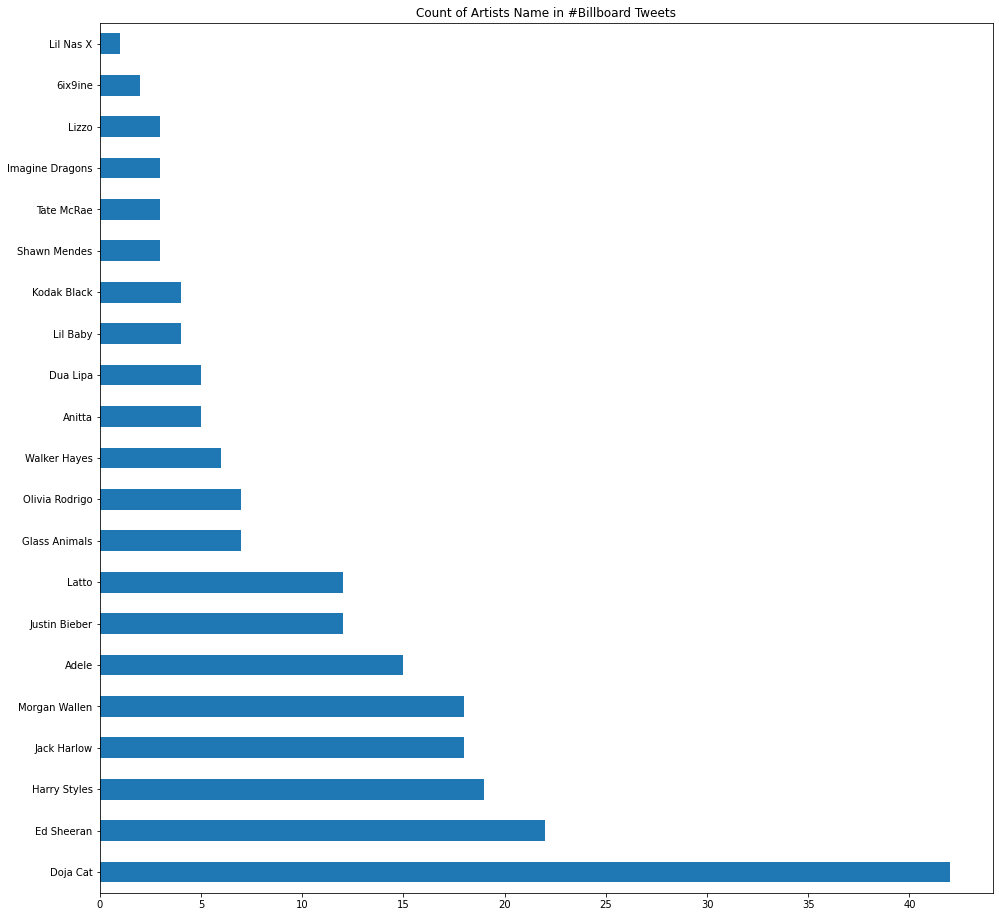

In [ ]:
to_one_d(result['Artists Detected']).value_counts().plot(kind='barh', figsize = (16,16))
plt.title('Count of Artists Name in #Billboard Tweets')

Text(0.5, 1.0, 'Count of Artists Song Name in #Billboard Tweets')

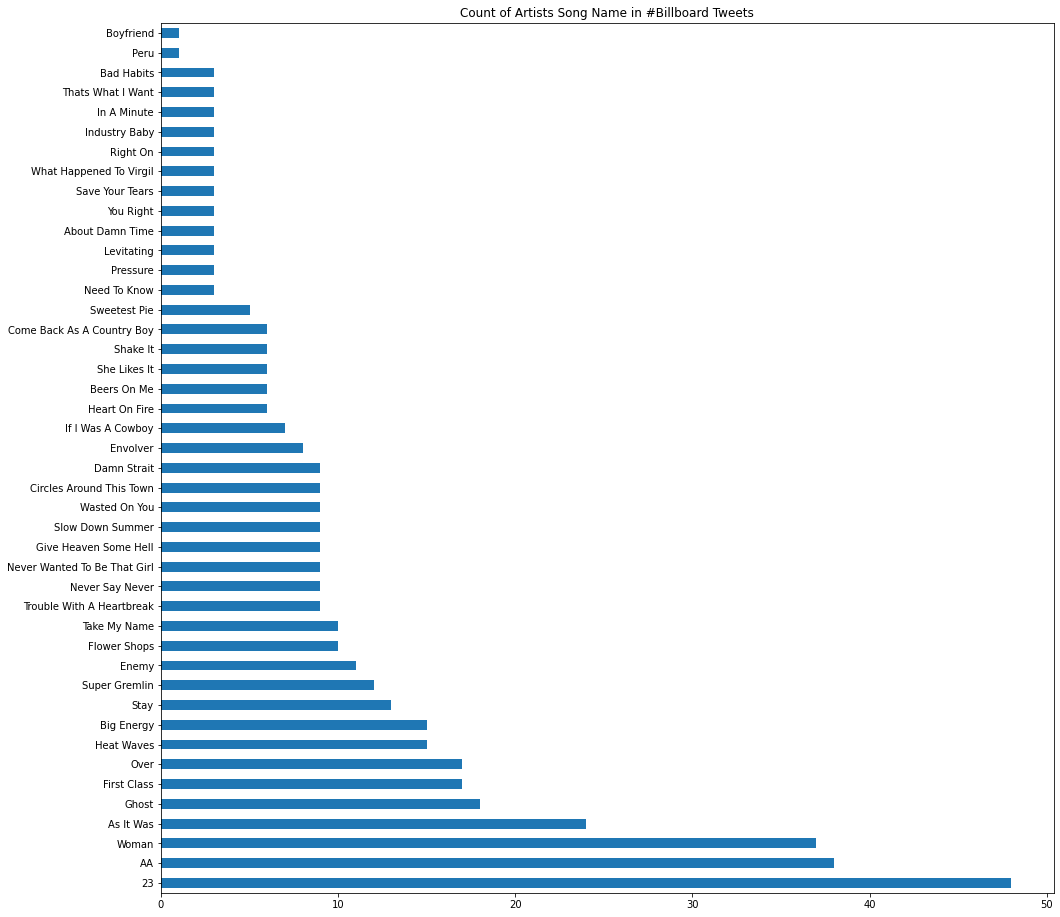

In [ ]:
to_one_d(result['Song Detected']).value_counts().plot(kind='barh', figsize=(16,16))
plt.title('Count of Artists Song Name in #Billboard Tweets')

In [ ]:
#doing the same process for the #NowPlaying dataframe
artist_test_np = []
for i in result_np['Cleaned Tweet']:
  artist_test_np.append([x for x in artists if(x in i)])

In [ ]:
result_np['Artists Detected'] = artist_test_np

In [ ]:
song_test_np = []
for i in result_np['Cleaned Tweet']:
  song_test_np.append([x for x in song_name if(x in i)])

In [ ]:
result_np['Song Detected'] = song_test_np

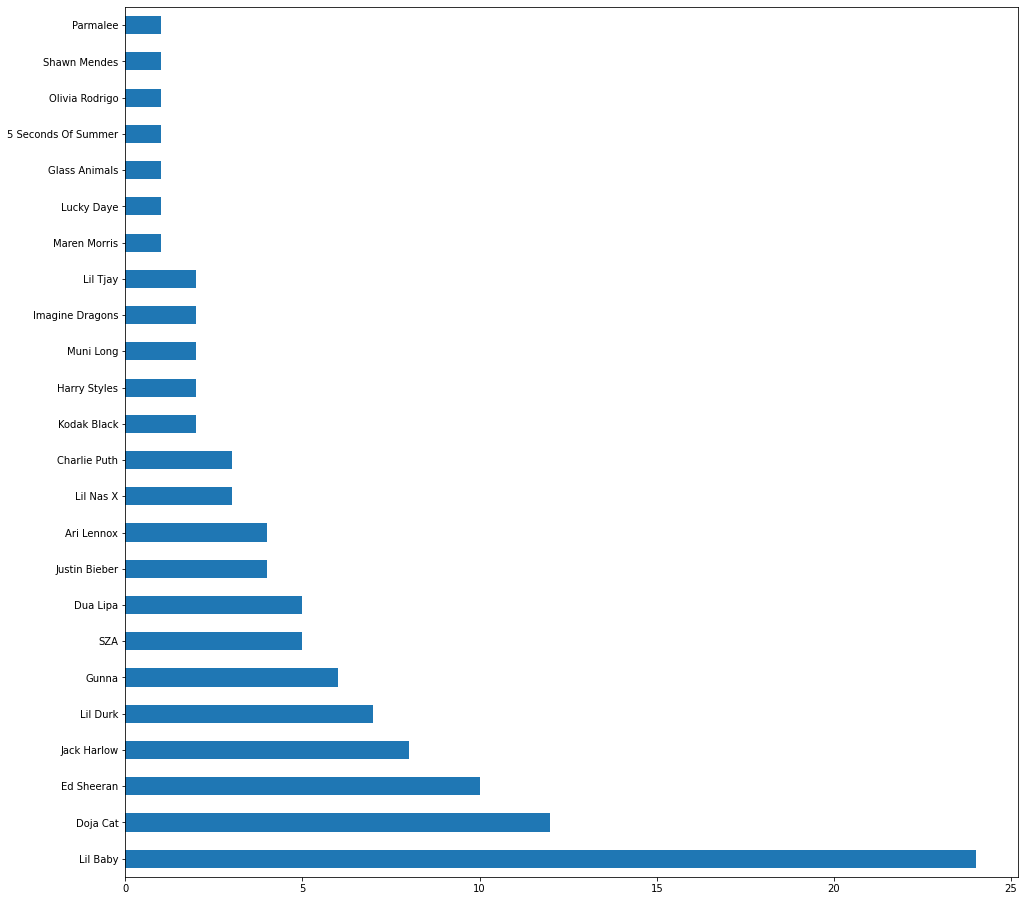

In [ ]:
to_one_d(result_np['Artists Detected']).value_counts().plot(kind='barh', figsize = (16,16))

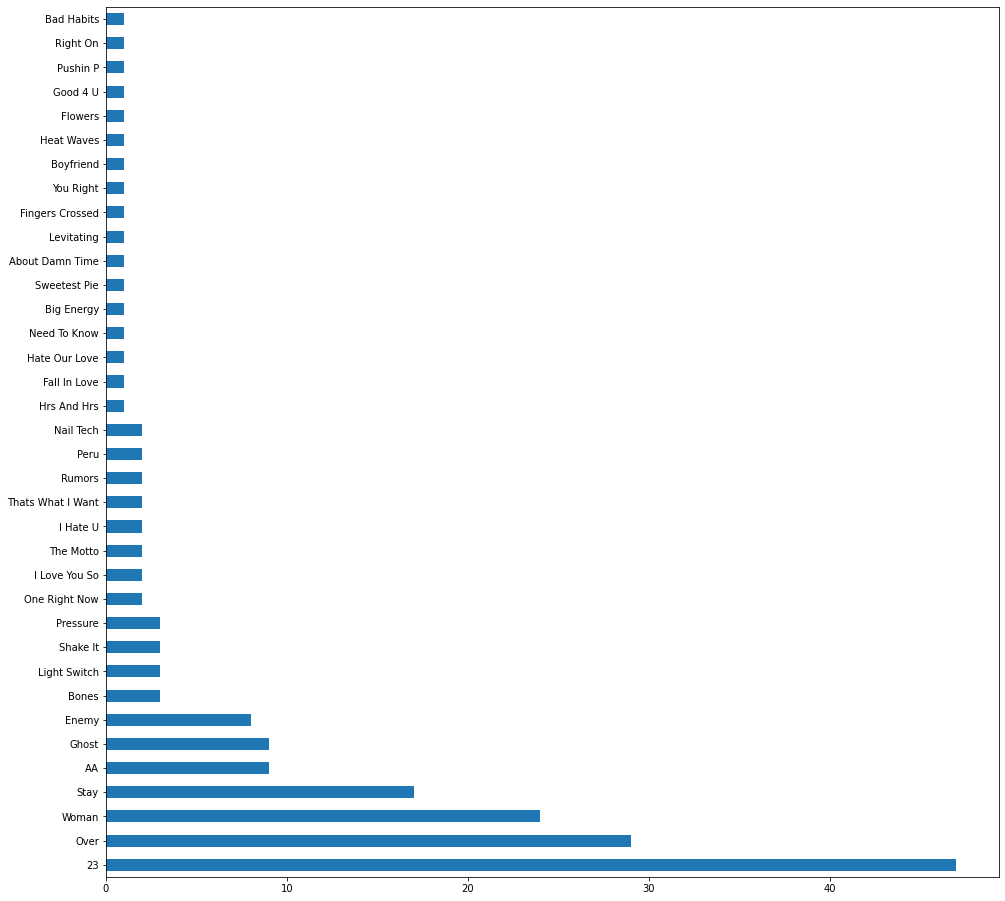

In [ ]:
to_one_d(result_np['Song Detected']).value_counts().plot(kind='barh', figsize=(16,16))